# Final Analysis Results

In [200]:
import glob
import ipdb
import pickle as pkl
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [182]:
ls ../../results_inference

detfull_encoder_task_graph/  VAE.KL.0.0/


In [208]:
def get_files(file_path, use_posterior=False):
    if use_posterior:
        files = [file for file in glob.glob('{}/*.pkl'.format(file_path)) if 'posterior' in file]
    else:
        files = [file for file in glob.glob('{}/*.pkl'.format(file_path)) if 'posterior' not in file]
    return files

In [225]:
def bin_data(content, nbins=10, debug=False):
    # put data in nbins according to episode length
    res = content['results_total_tstep']['accuracy_pos_seed']
    nseeds = res.shape[0]
    length = content['length']
    bin_data = np.zeros((nbins, nseeds))
    
    tsteps_per_bin = length/nbins
    
    for i in range(nbins):
        ind1 = round(i * tsteps_per_bin)
        ind2 = round((i+1)*tsteps_per_bin)
        bin_data[i] = res[:, ind1:ind2, ...].mean(1)
    bin_data_mean = bin_data.mean(-1)
    bin_data_max = bin_data.max(-1)
    bin_data_std = bin_data.std(-1) / np.sqrt(11)
    return bin_data_mean, bin_data_std, bin_data_max

In [226]:
def get_info_episodes(exp_name):
    print(f"Loading {exp_name}")
    file_path = f'../../results_inference/{exp_name}'
    files_interest = get_files(file_path)
    all_mean, all_se, all_max = [], [], []
    for cfile_name in files_interest:
        with open(cfile_name, 'rb') as f:
            cont = pkl.load(f)
        b_mean, b_se, b_max = bin_data(cont)
        
        all_mean.append(b_mean[None, :])
        all_se.append(b_se[None, :])
        all_max.append(b_max[None, :])
    all_mean = np.concatenate(all_mean, 0)
    all_max = np.concatenate(all_max, 0)
    all_se = np.concatenate(all_se, 0)
    return all_mean, all_se, all_max

['VAE.KL.0.001', 'detfull_encoder_task_graph', 'VAE.KL.1.0', 'VAE.KL.0.0']
#1f77b4
Loading VAE.KL.0.001
#ff7f0e
Loading detfull_encoder_task_graph
#2ca02c
Loading VAE.KL.1.0
#d62728
Loading VAE.KL.0.0


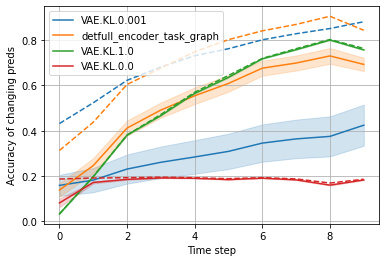

In [227]:
names = [x.split('/')[-1] for x in glob.glob('../../results_inference/*')]
print(names)
plt.figure()
ax = plt.gca()
for name_exp in names:
#     color=next(ax._get_lines.color_cycle)
    color=next(ax._get_lines.prop_cycler)['color']
    print(color)
    all_mean, all_se, all_max = get_info_episodes(name_exp)
    x = np.arange(10)
    mean_return = all_mean.mean(0)
    mean_se = all_se.mean(0)
    ymin = mean_return - mean_se
    ymax = mean_return + mean_se
    plt.plot(x, mean_return, label=name_exp, color=color)
    plt.plot(x, all_max.mean(0), '--', color=color)
    plt.fill_between(x, ymin, ymax, alpha=0.2, color=color)

plt.ylabel("Accuracy of changing preds")
plt.xlabel("Time step")
plt.grid()
plt.legend()

In [215]:
all_mean.shape

(293, 10)